# Import all the necessary models and packages.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns #for plotting graphs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from sklearn.metrics import explained_variance_score, \
    mean_absolute_error, \
    median_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn import metrics
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


from sklearn.linear_model import LogisticRegression


# Data Processing


In [3]:
file_url ='seattle-weather.csv'
df = pd.read_csv(file_url)

# Exploratory Data Analysis and Data visualization¶


In [4]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


Use the describe method to generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values

In [5]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [6]:
df.shape

(1461, 6)

In [7]:
df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [8]:
df.dtypes

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

In [9]:
df['weather'].count()

1461

# Data Cleaning

2) Converting Date variable which is object to Pandas compatible datetime datatype

In [10]:
import datetime as dt
df['date'] = pd.to_datetime(df['date'])


In [11]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


# Computing new columns

In [12]:
df['Month'] = df['date'].dt.month
df['Year'] = df['date'].dt.year

# Drop columns which are not required

In [13]:
df.drop(["date"], axis = 1, inplace = True)

In [14]:
df.head()

,precipitation,temp_max,temp_min,wind,weather,Month,Year
0,0.0,12.8,5.0,4.7,drizzle,1,2012
1,10.9,10.6,2.8,4.5,rain,1,2012
2,0.8,11.7,7.2,2.3,rain,1,2012
3,20.3,12.2,5.6,4.7,rain,1,2012
4,1.3,8.9,2.8,6.1,rain,1,2012


In [15]:
df.columns

Index(['precipitation', 'temp_max', 'temp_min', 'wind', 'weather', 'Month',
       'Year'],
      dtype='object')

In [16]:
df.head()

,precipitation,temp_max,temp_min,wind,weather,Month,Year
0,0.0,12.8,5.0,4.7,drizzle,1,2012
1,10.9,10.6,2.8,4.5,rain,1,2012
2,0.8,11.7,7.2,2.3,rain,1,2012
3,20.3,12.2,5.6,4.7,rain,1,2012
4,1.3,8.9,2.8,6.1,rain,1,2012


In [17]:
df.columns

Index(['precipitation', 'temp_max', 'temp_min', 'wind', 'weather', 'Month',
       'Year'],
      dtype='object')

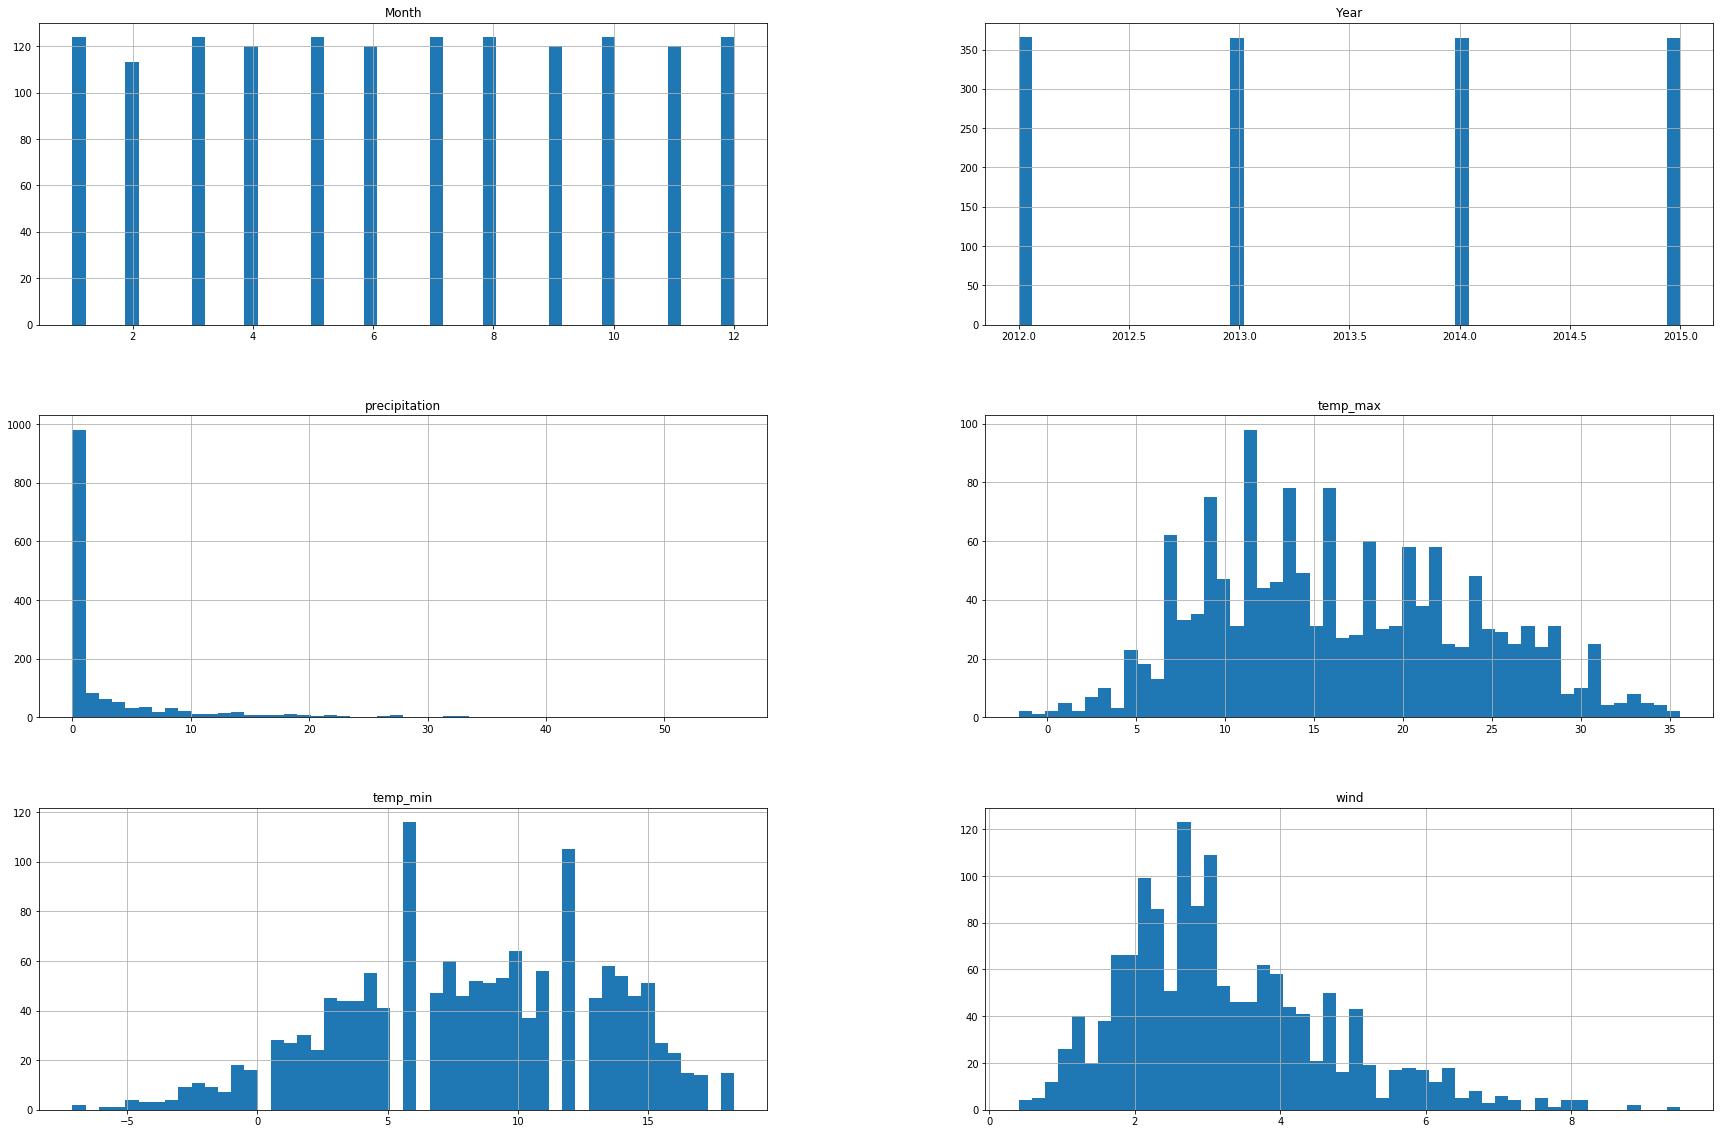

In [18]:
df.hist(bins=50, figsize=(30,20))
plt.show()

# Visualization of some variations

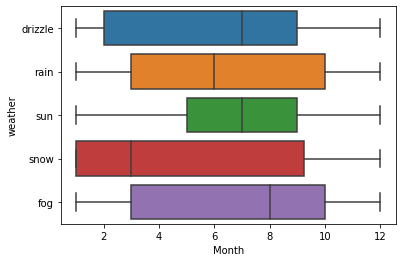

In [19]:
sns.boxplot(x= df['Month'], y=df["weather"])

In [20]:
y=df["weather"]

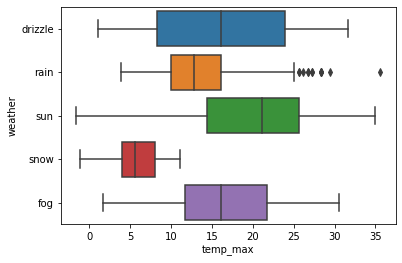

In [21]:
sns.boxplot(x= df['temp_max'], y=df["weather"])

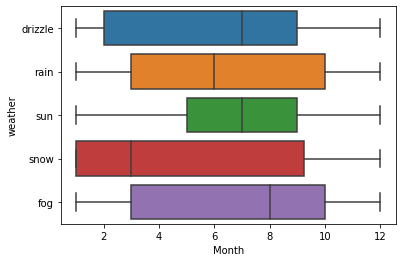

In [22]:
sns.boxplot(x= df['Month'], y=df["weather"])

In [23]:
df.columns

Index(['precipitation', 'temp_max', 'temp_min', 'wind', 'weather', 'Month',
       'Year'],
      dtype='object')

In [24]:
Xall = df[[ 'precipitation', 'temp_max', 'temp_min', 'wind', 'Year', 'Month']]
yall = df["weather"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(Xall, yall, test_size=0.20, random_state=0)

# Logistic Regression

In [26]:
# Manual tuned paramters for Logistic Regression Model
logmodel = LogisticRegression(C=0.01, penalty='l1', solver='liblinear')
logmodel.fit(X_train, y_train)

predictions = logmodel.predict(X_test)

logmodel.coef_

print("Accuracy", metrics.accuracy_score(y_test, predictions))


Accuracy 0.7303754266211604


/Users/lakshmi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [30]:


# Print results to evaluate model
print("Showing Performance Metrics for Logistic Regression\n")

print ("Training Accuracy: {}".format(logmodel.score(X_train, y_train)))
predicted = logmodel.predict(X_test)
print ("Testing Accuracy: {}".format(metrics.accuracy_score(y_test, predicted)))

print("\n")

print("Cross Validation Accuracy: \n")
cv_accuracy = cross_val_score(estimator=logmodel, X=X_train, y=y_train, cv=10)
print("Accuracy using 10 folds: ")
print(cv_accuracy)

print("\n")

print("Mean accuracy: {}".format(cv_accuracy.mean()))
print("Standard Deviation: {}".format(cv_accuracy.std()))


Showing Performance Metrics for Logistic Regression

Training Accuracy: 0.7876712328767124
Testing Accuracy: 0.7303754266211604


Cross Validation Accuracy: 

Accuracy using 10 folds: 
[0.81512605 0.74789916 0.78813559 0.74358974 0.78632479 0.80172414
 0.77586207 0.74137931 0.8173913  0.80869565]


Mean accuracy: 0.7826127806982021
Standard Deviation: 0.027982321411295922


/Users/lakshmi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/lakshmi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/lakshmi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/lakshmi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warnin

# Decision Tree

In [31]:


model = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
model.fit(X_train, y_train)




DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [32]:
# Print results to evaluate model
print("Showing Performance Metrics for Decision Tree Classifier\n")

print ("Training Accuracy: {}".format(model.score(X_train, y_train)))
predicted = model.predict(X_test)
print ("Testing Accuracy: {}".format(accuracy_score(y_test, predicted)))

print("\n")

Showing Performance Metrics for Decision Tree Classifier

Training Accuracy: 0.8904109589041096
Testing Accuracy: 0.7986348122866894




In [33]:
print("Cross Validation Accuracy: \n")
cv_accuracy = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10)
print("Accuracy using 10 folds: ")
print(cv_accuracy)

print("\n")


Cross Validation Accuracy: 

Accuracy using 10 folds: 
[0.87394958 0.86554622 0.8559322  0.82905983 0.82051282 0.84482759
 0.8362069  0.87068966 0.8        0.87826087]




In [34]:
print("Mean accuracy: {}".format(cv_accuracy.mean()))
print("Standard Deviation: {}".format(cv_accuracy.std()))

print("\n")

Mean accuracy: 0.847498565877806
Standard Deviation: 0.02457562461829965


